# This notebook show how to do 

## Fisher LDA


In [3]:
import matplotlib
%matplotlib inline
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage.transform import  resize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [4]:
#You may have to uncomment these lines
#! pip install keras
#!pip install tensorflow

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(x_train.shape)
#print(x_test.shape)

Using TensorFlow backend.


**train Data is of shape (60000, 28, 28). It contains 60000 digits of shape 28X28. **
Data is loaded in **numpy  array object. It provides powerful multi dimensional array abstraction. 2d array provides matrix abstraction**. Checkout [numpy](http://www.numpy.org/) for quick numpy review.


In [6]:
matplotlib.rcParams['figure.figsize'] = (1, 1)

## LDA part

# working with full dataset

In [8]:
X= x_train
Y= y_train
print(Y.shape)

(60000,)


In [8]:
#!pip install --upgrade scikit-image

In [9]:
# You may be un comment next line to install skimage if it is not installed.
#!pip install scikit-image

Resizing 28x28 image to 8x8

<font color = 'red'> following operation will take some time. Don't run this cell repeatedly <font>

In [10]:
new_img_size = (8,8)
X_resz = np.zeros((X.shape[0],np.product(new_img_size) ))
for i in range(X.shape[0]):
    x = resize(X[i], new_img_size)
    X_resz[i,:] = x.reshape((-1))
print(X_resz.shape)    

(60000, 64)


In [11]:
# Let's plot some random images
np.random.seed(1)
n_samples = X.shape[0]
samples_to_plot = 10
indexes = np.random.randint(0, high=n_samples, size= [samples_to_plot])
print(indexes)

[33003 12172  5192 32511 50057 43723  7813 52047 21440 32912]


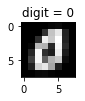

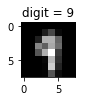

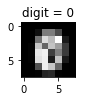

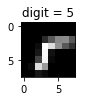

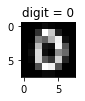

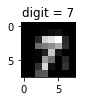

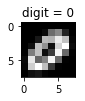

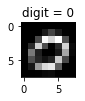

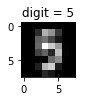

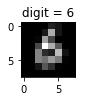

In [12]:
for idx in indexes:
    plt.imshow(np.reshape(X_resz[idx,:], new_img_size),cmap= 'gray' )
    plt.title('digit = {}'.format(str(Y[idx])))
    plt.show()

In [13]:
lda = LDA(solver = 'eigen')
lda_fit = lda.fit(X_resz, Y)

In [14]:
X_lda = lda_fit.transform(X_resz)

In [15]:
X_lda.shape

(60000, 9)

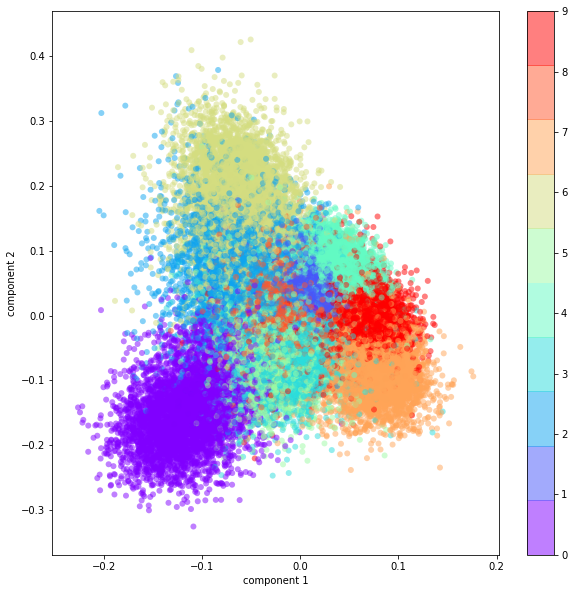

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(X_lda[:, 0], X_lda[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

See how you can find the documentation of functions in the notebook by 
 - using **\?** after function name like **np.unique?**
 - **shift+tab** to see function signature

In [21]:
np.unique?

In [35]:
unique_class_label = np.unique(Y)
#unique_class_label
print(np.unique(Y))

[0 1 2 3 4 5 6 7 8 9]


In [23]:
num_classes = len(unique_class_label)
num_classes


10

# Multiclass LDA 

Let say we have $C$ classes

- $n_k=$ number of sample in class k
- $n = \sum_{k=1}^C n_k$ total sample
- class $k$ mean $\mu_k= \frac{\sum_{i:y_i= k}x_i}{n_i}$ and
- over all mean $\mu= \frac{\sum_{i} x_i}{n}$

In multi class LDA we find directions of projection by solving

$S_b v = \lambda S_w v$


where

- Within class scatter matrix  $S_w = \sum_{k=1}^C S_k$ and $S_k=  \sum_{i:y_i=k}((x_i - \mu_i)(x_i -\mu_i)^T)$
i.e class k unscaled covariance

- Between class scatter matrix $Sb =   \sum_{k=i}^{k=C} n_k (\mu_i - \mu)(\mu_i -\mu)^T$

Note maximum rank of $Sb$ is $C-1$


# Computation of Sb and Sw

- **Check exactly only nine eigen values are non zero. other are almost zero as we have 10 classes**

- see
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.eigh.html

In [17]:
def find_index(data, value):
    ind = []
    for i in range(Y.shape[0]):
        if data[i] == value:
           ind.append(i)
    return ind
zero_ind = find_index(Y, 0)
one_ind = find_index(Y, 1)
two_ind = find_index(Y, 2)
three_ind = find_index(Y, 3)
four_ind = find_index(Y, 4)
five_ind = find_index(Y, 5)
six_ind = find_index(Y, 6)
seven_ind = find_index(Y, 7)
eight_ind = find_index(Y, 8)
nine_ind = find_index(Y, 9)

In [18]:
def find_class(indexes):
    number = np.zeros((len(indexes),X_resz.shape[1]))
    C = 0
    for idx in indexes:
        number[C,:] = X_resz[idx]
        C += 1
    return number
zeros = find_class(zero_ind)
ones = find_class(one_ind)
twos = find_class(two_ind)
threes = find_class(three_ind)
fours = find_class(four_ind)
fives = find_class(five_ind)
sixes = find_class(six_ind)
sevens = find_class(seven_ind)
eights = find_class(eight_ind)
nines = find_class(nine_ind)

In [19]:
Var_zero = zeros - np.mean(zeros, axis=0)
Var_one = ones - np.mean(ones, axis=0)
Var_two = twos - np.mean(twos, axis=0)
Var_three = threes - np.mean(threes, axis=0)
Var_four = fours - np.mean(fours, axis=0)
Var_five = fives - np.mean(fives, axis=0)
Var_six = sixes - np.mean(sixes, axis=0)
Var_seven = sevens - np.mean(sevens, axis=0)
Var_eight = eights - np.mean(eights, axis=0)
Var_nine = nines - np.mean(nines, axis=0)

In [20]:
s_w0 = np.dot(Var_zero.T, Var_zero)
s_w1 = np.dot(Var_one.T, Var_one)
s_w2 = np.dot(Var_two.T, Var_two)
s_w3 = np.dot(Var_three.T, Var_three)
s_w4 = np.dot(Var_four.T, Var_four)
s_w5 = np.dot(Var_five.T, Var_five)
s_w6 = np.dot(Var_six.T, Var_six)
s_w7 = np.dot(Var_seven.T, Var_seven)
s_w8 = np.dot(Var_eight.T, Var_eight)
s_w9 = np.dot(Var_nine.T, Var_nine)

In [21]:
S_W = s_w0 + s_w1 + s_w2 + s_w3 + s_w4 + s_w5 + s_w6 + s_w7 + s_w8 + s_w9
#print(s_w.shape)
#print(S_W)

[[ 1.33877734e-03  1.62405525e-03  3.40613879e-04 ... -1.71438043e-04
  -2.19369029e-05 -9.68210888e-07]
 [ 1.62405525e-03  4.17459532e-01  1.02603877e+00 ... -7.14313686e-03
   1.30190594e-06 -2.76195670e-04]
 [ 3.40613879e-04  1.02603877e+00  1.27320966e+01 ... -1.97629103e-01
  -4.14235922e-02 -3.77828695e-03]
 ...
 [-1.71438043e-04 -7.14313686e-03 -1.97629103e-01 ...  1.29322252e+02
   1.25960219e+01  1.55371519e-02]
 [-2.19369029e-05  1.30190594e-06 -4.14235922e-02 ...  1.25960219e+01
   1.09542501e+01  2.99944344e-01]
 [-9.68210888e-07 -2.76195670e-04 -3.77828695e-03 ...  1.55371519e-02
   2.99944344e-01  6.47833083e-02]]


In [22]:
Zeromean=np.mean(zeros, axis=0)
Onemean=np.mean(ones, axis=0)
Twomean=np.mean(twos, axis=0)
Threemean=np.mean(threes, axis=0)
Fourmean=np.mean(fours, axis=0)
Fivemean=np.mean(fives, axis=0)
Sixmean=np.mean(sixes, axis=0)
Sevenmean=np.mean(sevens, axis=0)
Eightmean=np.mean(eights, axis=0)
Ninemean=np.mean(nines, axis=0)
Totalmean=(Zeromean+Onemean+Twomean+Threemean+Fourmean+Fivemean+Sixmean+Sevenmean+Eightmean+Ninemean)/10
print(Zeromean.shape)

(64,)


In [23]:
Bmean_Zero=Zeromean-Totalmean
Bmean_One=Onemean-Totalmean
Bmean_Two=Twomean-Totalmean
Bmean_Three=Threemean-Totalmean
Bmean_Four=Fourmean-Totalmean
Bmean_Five=Fivemean-Totalmean
Bmean_Six=Sixmean-Totalmean
Bmean_Seven=Sevenmean-Totalmean
Bmean_Eight=Eightmean-Totalmean
Bmean_Nine=Ninemean-Totalmean

In [24]:
SB_Zero=np.dot(Bmean_Zero[np.newaxis].T,Bmean_Zero[np.newaxis])
SB_One=np.dot(Bmean_One[np.newaxis].T,Bmean_One[np.newaxis])
SB_Two=np.dot(Bmean_Two[np.newaxis].T,Bmean_Two[np.newaxis])
SB_Three=np.dot(Bmean_Three[np.newaxis].T,Bmean_Three[np.newaxis])
SB_Four=np.dot(Bmean_Four[np.newaxis].T,Bmean_Four[np.newaxis])
SB_Five=np.dot(Bmean_Five[np.newaxis].T,Bmean_Five[np.newaxis])
SB_Six=np.dot(Bmean_Six[np.newaxis].T,Bmean_Six[np.newaxis])
SB_Seven=np.dot(Bmean_Seven[np.newaxis].T,Bmean_Seven[np.newaxis])
SB_Eight=np.dot(Bmean_Eight[np.newaxis].T,Bmean_Eight[np.newaxis])
SB_Nine=np.dot(Bmean_Nine[np.newaxis].T,Bmean_Nine[np.newaxis])

In [25]:
S_B=SB_Zero+SB_One+SB_Two+SB_Three+SB_Four+SB_Five+SB_Six+SB_Seven+SB_Eight+SB_Nine
print(S_B.shape)

(64, 64)


In [33]:
eig_Values,eig_Vectors=np.linalg.eig(np.dot(np.linalg.inv(S_W),S_B))
S = np.argsort(eig_Values)[::-1]
eig_Values = eig_Values[S]
eig_Vectors = eig_Vectors[:,S]
#print(eig_Values)

[ 5.23276314e-04+0.00000000e+00j  4.20894627e-04+0.00000000e+00j
  3.19042559e-04+0.00000000e+00j  2.21676070e-04+0.00000000e+00j
  1.51675612e-04+0.00000000e+00j  1.35510070e-04+0.00000000e+00j
  1.08451609e-04+0.00000000e+00j  6.73400078e-05+0.00000000e+00j
  3.75520778e-05+0.00000000e+00j  1.81135138e-19+0.00000000e+00j
  1.29720736e-19+0.00000000e+00j  1.26867757e-19+3.11784534e-20j
  1.26867757e-19-3.11784534e-20j  9.50811893e-20+0.00000000e+00j
  7.18559749e-20+0.00000000e+00j  6.70120604e-20+3.50558091e-20j
  6.70120604e-20-3.50558091e-20j  4.10647761e-20+7.54120276e-21j
  4.10647761e-20-7.54120276e-21j  3.95802061e-20+2.53380922e-20j
  3.95802061e-20-2.53380922e-20j  3.43451024e-20+2.64314114e-20j
  3.43451024e-20-2.64314114e-20j  2.74574888e-20+0.00000000e+00j
  1.39126995e-20+1.47360677e-20j  1.39126995e-20-1.47360677e-20j
  1.18372696e-20+4.19863432e-21j  1.18372696e-20-4.19863432e-21j
  9.58555591e-21+6.99624103e-20j  9.58555591e-21-6.99624103e-20j
  6.82345240e-21+0.000000

#  Eigen vectors will not be not unit length. Normalize(make unit length) them

In [34]:
for i in range(64):
    length = np.linalg.norm(eig_Vectors[:, i])
    eig_Vectors[:, i]=eig_Vectors[:, i]/length

# Building projection matrix using 9 eigen vectors and project data into these 9 direction. Visualizing first two components as done earlier using scatter plot.

Putting eigen vectors along column and ordering them by decreasing eigen value

In [35]:
#Projection Matrix :
Projection=eig_Vectors[:, :9]
print(Projection.shape)
#Projected Matrix :
X_proj= np.dot(X_resz, Projection)
print(X_proj.shape)

(64, 9)
(60000, 9)


C:\Users\18482\Anaconda3\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


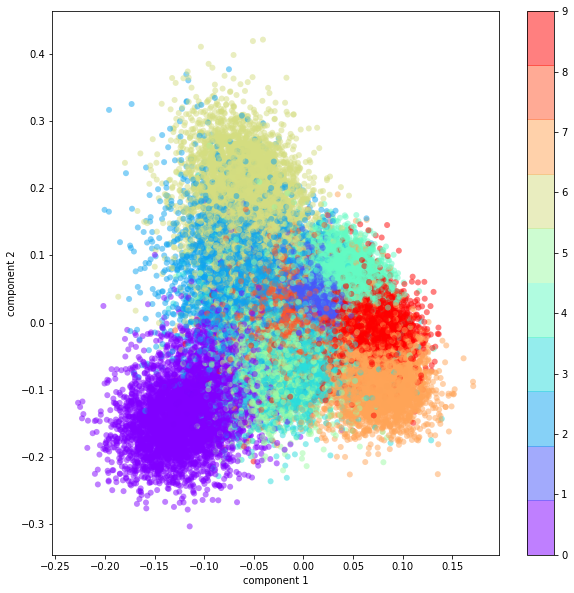

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(X_proj[:, 0], X_proj[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();